<a href="https://colab.research.google.com/github/rodolfoplondero/Algoritmos-de-Ordenacao/blob/main/Ordena%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entradas

Cada método deverá ordenar os dados em diversos tamanhos de entrada. Considere os dados com os seguintes tamanhos: $10, 10^2, 10^3, 10^4, 10^5, 10^6$. Os valores devem ser gerados aleatoriamente e uma única vez em todos os experimentos.

# Saída

A saída consiste na análise comparativa do tempo de ordenação entre os métodos. Deverá ser avaliada a ordenação com dados em três situaçãos: a) aleatórios; b) já ordenados (crescente); c) inversamente ordenados. Deverá ser gerado um gráfico de linha para cada conjunto de dados.
Detalhes sobre a saída dos dados serão comentadas em sala de aula

# Implementação

## Importando as bibliotecas

In [59]:
import numpy as np
import time
import random
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter
from pprint import pprint

## Definição dos Algoritmos de Ordenação

### Bubble Sort

In [60]:
#----------------------------------------------------------------------
# Bubble Sort (Bolha)
#----------------------------------------------------------------------
def bubbleSort(array):    
    tamanho_array = len(array)

    for posFinal in range(tamanho_array - 1, 0, -1):
        trocou = False
        
        for pos in range(posFinal):
            if array[pos] > array[pos+1]:
                array[pos], array[pos+1] = array[pos+1], array[pos]
                trocou = True
                
        if not trocou:
            break

    return array

### Selection Sort

In [61]:
#----------------------------------------------------------------------
# Selection Sort (Seleção)
#----------------------------------------------------------------------
def selectionSort(array):

    tamanho_array = len(array)

    for index in range(0, tamanho_array):
        min_index = index
        
        for j in range(index + 1, tamanho_array):
            if array[j] < array[min_index]:
                min_index = j
        
        array[index], array[min_index] = array[min_index], array[index]

    return array

### Insertion Sort

In [64]:
#----------------------------------------------------------------------
# Insertion Sort (Inserção)
#----------------------------------------------------------------------
def insertionSort(array):

    tamanho_array = len(array)

    for i in range(0, tamanho_array):
        
        elemento_atual = array[i]

        while (i > 0) and (array[i - 1] > elemento_atual):
            array[i] = array[i - 1]
            i -= 1

        array[i] = elemento_atual

    return array

### Merge Sort

In [72]:
#----------------------------------------------------------------------
# Merge Sort
#----------------------------------------------------------------------
def mergeSort(array):    
    
    tamanho_array = len(array)

    if tamanho_array > 1:
        
        meio = tamanho_array // 2
        esquerda = array[:meio]
        direita = array[meio:]

        mergeSort(esquerda)
        mergeSort(direita)

        i = 0
        j = 0
        k = 0

        tamanho_esquerda = len(esquerda)
        tamanho_direita  = len(direita)

        while (i < tamanho_esquerda) and (j < tamanho_direita):
            if esquerda[i] < direita[j]:
                array[k] = esquerda[i]
                i += 1
            else:
                array[k] = direita[j]
                j += 1
            k += 1

        for i in range(i, tamanho_esquerda):
            array[k] = esquerda[i]
            k += 1
        
        for j in range(j, tamanho_direita):
            array[k] = direita[j]
            k += 1

        # while i < tamanho_esquerda:
        #     array[k] = esquerda[i]
        #     i += 1
        #     k += 1

        # while j < tamanho_direita:
        #     array[k] = direita[j]
        #     j += 1
        #     k += 1
    
    return array

### Quick Sort

In [66]:
#----------------------------------------------------------------------
# Quick Sort (Bolha)
#----------------------------------------------------------------------
def quickSort(array):
    
    if len(array) < 1:
        return array
    else:
        pIndex = len(array) // 2  # Pivot defino como o elemento médio do array
        pivot = array.pop(pIndex)

    maiores = []
    menores = []

    for item in array:
        if item > pivot:
            maiores.append(item)
        else:
            menores.append(item)

    return quickSort(menores) + [pivot] + quickSort(maiores)

## Aplicação dos algoritmos

In [87]:
# Função usada para aplicar cada algoritmo e imprimir logs
def aplicacao_algoritmos(algoritmo, key, val):
    print(f"Array {key}...", end=" ")

    # Início do timer
    ti = time.time()
    
    # Aplicação do algoritmo
    res = algoritmo(val) 
    
    # Fim do timer
    t = time.time() - ti 

    if t > 1:
        print(f"{t:.4f} s", end=" ")
    else:
        print(f"{t*1000:.4f} ms", end=" ")
    
    print("[", end="")
    x = 0
    while x < len(res):
        if x <= 15:
            print(res[x], end=", ")
        x += 1
    print("...]")

    return res, t

## Definição dos casos e inicialização de variáveis

In [84]:
# Casos
casos = {'caso_1': 10,
         'caso_2': 10**2,
         'caso_3': 10**3,
         'caso_4': 10**4,
         'caso_5': 10**5,
         'caso_6': 10**6}

# Algoritmos
algoritmos = ['bolha', 'insercao', 'selecao', 'quick', 'merge']

# Arranjos
arrays     = ['ordenado', 'inverso', 'aleatorio']

# Inicialização dos dicionários para armazenamento dos tempos e dos arrays ordenados
#
# Ex:
#   Caso_1:
#       Bolha:
#           Ordenado:  0
#           Inverso:   0
#           Aleatório: 0
#       Inserção:
#           Ordenado:  0
#           Inverso:   0
#           Aleatório: 0
#  E assim por diante para os demais casos e algoritmos

tempos = dict()
resultados = dict()

for i in range(0, len(casos)):
    caso = f"caso_{i+1}"

    tempos[caso] = {}
    resultados[caso] = {}

    for j in algoritmos:
        tempos[caso][j] = {}
        resultados[caso][j] = {}

        for x in arrays:
            tempos[caso][j][x] = 0
            resultados[caso][j][x] = []

# Descomentar as linhas abaixo para visualizar os dicionários criados
# pprint(tempos)
# pprint(resultados)

# Caso 01

Array inicial - ordenado:  [5, 6, 7, 3, 4, 10, 2, 1, 9, 8, 0]
Array inicial - inverso:   [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Array inicial - aleatório: [5, 6, 7, 3, 4, 10, 2, 1, 9, 8, 0]
----------------------------------------------------------------------------------------------------

Aplicando o Algoritmo da Bolha...
Array ordenado... 0.0196 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array inverso... 0.0219 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array aleatorio... 0.0045 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]

Aplicando o Algoritmo de Seleção...
Array ordenado... 0.0131 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array inverso... 0.0122 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array aleatorio... 0.0105 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]

Aplicando o Algoritmo de Inserção...
Array ordenado... 0.0055 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array inverso... 0.0036 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array aleatorio... 0.0207 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

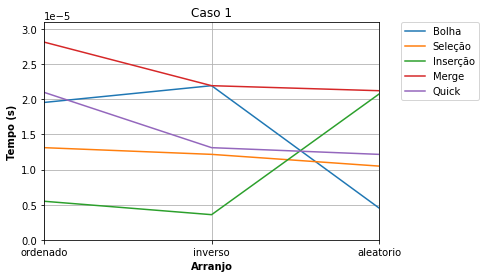

In [88]:
nome_caso = 'caso_1'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial                       # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True) # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial                      # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 02

Array inicial - ordenado:  [34, 19, 69, 28, 68, 16, 27, 90, 84, 86, 87, 65, 38, 100, 49, 31, 71, 78, 13, 76, 82, 5, 56, 93, 58, 43, 4, 3, 88, 30, 10, 99, 59, 9, 67, 45, 25, 98, 2, 26, 62, 22, 32, 50, 51, 64, 55, 52, 83, 74, 57, 73, 40, 21, 48, 54, 6, 94, 66, 1, 18, 63, 79, 85, 41, 44, 97, 46, 7, 8, 11, 29, 12, 81, 0, 17, 92, 37, 96, 77, 70, 95, 42, 80, 39, 36, 24, 91, 35, 15, 33, 23, 89, 20, 72, 60, 61, 14, 47, 75, 53]
Array inicial - inverso:   [100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Array inicial - aleatório: [34, 19, 69, 28, 68, 16, 27, 90, 84, 86, 87, 65, 38, 100, 49, 31, 71, 78, 13, 76, 82, 5, 56, 93, 58, 43, 4, 3, 88, 30, 10, 99, 

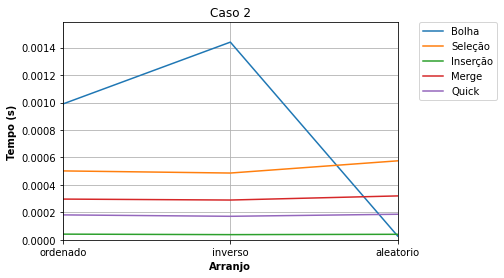

In [89]:
nome_caso = 'caso_2'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial                       # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True) # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial                      # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 03

Array inicial - ordenado:  [977, 133, 830, 916, 928, 179, 673, 346, 41, 281, 838, 507, 390, 818, 706, 31, 92, 823, 534, 573, 996, 148, 509, 352, 861, 785, 865, 970, 718, 741, 909, 154, 409, 1000, 919, 313, 730, 173, 607, 669, 765, 856, 784, 221, 170, 4, 755, 859, 850, 603, 572, 452, 666, 185, 958, 551, 167, 263, 758, 141, 127, 558, 60, 926, 657, 25, 360, 172, 230, 96, 597, 256, 427, 482, 615, 650, 613, 388, 757, 32, 503, 381, 839, 875, 15, 151, 231, 738, 918, 431, 889, 10, 137, 510, 906, 35, 462, 874, 374, 654, 366, 688, 528, 644, 61, 618, 338, 341, 635, 640, 999, 776, 638, 84, 756, 779, 950, 480, 317, 2, 981, 412, 81, 576, 627, 734, 327, 194, 451, 836, 265, 787, 532, 254, 387, 892, 685, 241, 65, 396, 842, 930, 465, 325, 764, 524, 727, 169, 296, 175, 428, 533, 552, 544, 948, 324, 763, 811, 30, 708, 519, 790, 837, 703, 73, 147, 375, 453, 561, 486, 824, 672, 664, 488, 752, 577, 899, 805, 430, 237, 564, 744, 421, 165, 69, 193, 804, 36, 857, 406, 66, 307, 5, 234, 287, 511, 479, 481, 459, 7

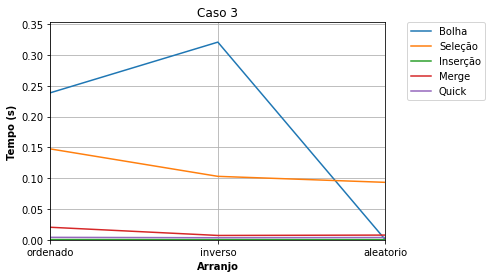

In [55]:
nome_caso = 'caso_3'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial                       # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True) # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial                      # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 04

Array inicial - ordenado:  [5233, 3505, 838, 7803, 1811, 1963, 8138, 4364, 2642, 5300, 3737, 8794, 7412, 9863, 7318, 9321, 6994, 6001, 8882, 4186, 8468, 1709, 9630, 1970, 880, 5272, 7265, 2848, 6882, 3653, 6619, 5563, 5023, 5355, 3054, 9536, 7637, 7334, 4690, 9697, 5710, 2220, 7175, 8501, 1962, 8879, 4984, 2420, 8090, 2021, 450, 6531, 161, 7608, 5, 6566, 7867, 687, 9888, 8068, 4784, 4156, 8667, 4129, 9658, 8798, 9251, 2342, 4418, 807, 6632, 4092, 1470, 9715, 5767, 8590, 6227, 1208, 5938, 5522, 71, 2345, 7094, 750, 6536, 5161, 1036, 2170, 5464, 1217, 8845, 45, 544, 3118, 2505, 2578, 9794, 3877, 5228, 2678, 274, 9842, 1655, 398, 3728, 3913, 4824, 2346, 70, 9160, 9655, 2450, 1387, 8516, 8308, 2514, 1517, 3463, 3699, 8014, 3694, 4514, 2228, 6226, 8665, 6538, 6003, 8989, 9450, 8672, 1479, 2953, 8507, 3857, 9897, 2973, 9464, 6611, 3137, 2236, 4137, 8283, 2843, 9370, 8679, 3944, 8982, 1735, 4708, 2735, 9343, 4285, 3484, 8658, 1455, 4827, 1414, 8494, 7106, 3124, 826, 4791, 351, 9013, 5030, 359

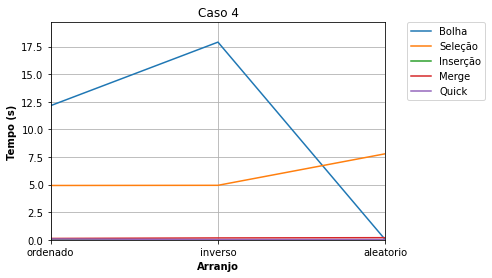

In [56]:
nome_caso = 'caso_4'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial                       # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True) # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial                      # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 05

In [ ]:
nome_caso = 'caso_5'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial                       # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True) # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial                      # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

Array inicial - ordenado:  [11366, 40223, 22243, 33439, 78128, 80698, 53060, 79373, 32902, 44524, 27191, 53849, 4945, 31398, 21532, 58864, 41388, 73921, 25014, 97727, 99199, 72789, 66272, 20673, 67560, 82276, 38072, 96701, 48713, 96597, 75639, 25138, 59022, 49338, 32605, 13298, 63446, 4056, 9417, 20407, 44728, 46896, 82545, 39089, 11849, 23320, 45198, 85411, 45195, 32033, 16963, 7705, 87439, 39348, 92682, 96247, 22589, 35275, 90946, 18544, 19753, 50327, 8040, 73298, 19940, 94470, 79916, 81066, 14186, 56466, 74239, 14695, 99679, 86241, 18745, 77570, 83173, 84937, 87609, 39133, 72487, 89742, 65051, 71824, 8086, 1049, 73563, 68951, 61694, 97436, 69127, 30797, 88993, 64202, 18261, 36611, 17394, 34385, 14499, 87244, 53068, 87304, 63836, 41080, 78593, 35026, 71352, 94860, 81907, 40918, 24806, 4204, 47099, 93199, 93177, 14263, 81265, 86266, 27776, 24344, 20855, 3045, 83520, 76941, 72742, 82244, 2018, 80214, 18652, 29690, 84525, 22236, 6484, 8275, 94722, 46490, 35103, 84955, 69528, 75491, 9200